# Rep 2. KNN 분류

### 소셜 네트워크 광고 데이터셋을 사용
https://www.kaggle.com/rakeshrau/social-network-ads => Social_Network_Ads.csv

### 목표
성별, 나이, 급여가 주어졌을 때 광고에 나오는 상품을 구매하는지 구매하지 않는지 분류

### 데이터 분석
- User ID : 유저 아이디
- Gender : 성별
- Age : 나이
- EstimatedSalary : 급여
- Purchased : 구매 여부 (0: 구매안함 / 1: 구매함)

### 1. 데이터 수집
CSV 불러오기

In [10]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### 2. 데이터 가공
input_data와 target_data 분리

In [11]:
input_data = df[['Gender', 'Age', 'EstimatedSalary']].to_numpy()
target_data = df['Purchased'].to_numpy()
input_data

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

- Zscore로 스케일링하려고 하니 오류 발생

In [12]:
# 표준 점수 (Z 점수)로 바꾸기
import numpy as np

mean = np.mean(input_data, axis=0)
std = np.std(input_data, axis=0)

input_scaled = (input_data - mean) / std

input_scaled

TypeError: unsupported operand type(s) for /: 'str' and 'int'

- TypeError: unsupported operand type(s) for /: 'str' and 'int'
- 데이터에 문자열이 포함되어 있어서 그런 것 같다.
- Male을 0, Female을 1로 치환 작업 진행해야 한다.
- 사이킷런의 LabelEncoder를 사용하여 간단하게 인코딩을 할 수 있다.
- https://steadiness-193.tistory.com/243
- encoder.fit() 메서드는 인코딩 할 범주를 찾아내는 메서드이다.
- 따라서 Gender 열만을 주어 범주를 설정하게 해야한다.

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['Gender'])
gender_encoded = encoder.transform(df['Gender'])
gender_encoded

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

- 인코딩 된 Gender 열을 input_data에 넣어준다.

In [14]:
gender_encoded_df = pd.DataFrame(gender_encoded, columns=['Gender'])
df['Gender'] = gender_encoded_df
input_data = df[['Gender', 'Age', 'EstimatedSalary']].to_numpy()
input_data

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]])

Zscore로 스케일링 재시도

In [15]:
# 표준 점수 (Z 점수)로 바꾸기
import numpy as np

mean = np.mean(input_data, axis=0)
std = np.std(input_data, axis=0)

input_scaled = (input_data - mean) / std

input_scaled

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

### 3. 데이터 시각화

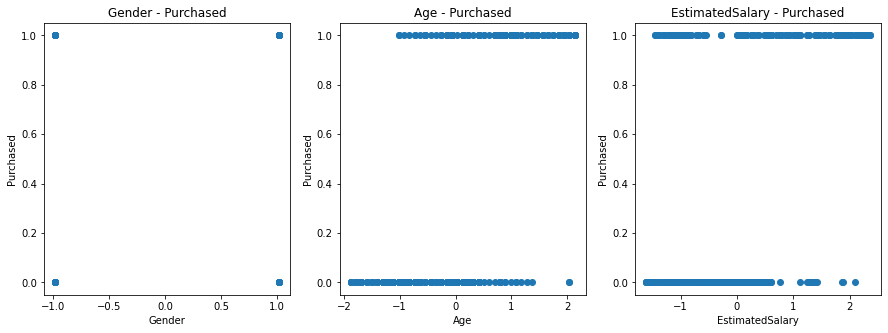

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Gender - Purchased')
plt.scatter(input_scaled[:, 0], target_data)
plt.xlabel('Gender')
plt.ylabel('Purchased')

plt.subplot(1, 3, 2)
plt.title('Age - Purchased')
plt.scatter(input_scaled[:, 1], target_data)
plt.xlabel('Age')
plt.ylabel('Purchased')

plt.subplot(1, 3, 3)
plt.title('EstimatedSalary - Purchased')
plt.scatter(input_scaled[:, 2], target_data)
plt.xlabel('EstimatedSalary')
plt.ylabel('Purchased')

plt.show()


### 4. 머신러닝 모델 생성

train과 test 데이터로 나눈 후,  
그대로 머신러닝 모델을 만드려고 하니까 오류 발생

In [17]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    input_scaled, target_data, stratify=target_data, random_state=45)

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.94

### 5. 평가

In [18]:
pred_data = np.array([[0, 35, 140000]])
pred_scaled = (pred_data - mean) / std

kn.predict(pred_scaled)


array([1])